In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

In [2]:
N = 100000

# P4.1

In [11]:
X = np.random.normal(size=N)
X = X[X > 0]

In [66]:
alpha = 2.5
xmin = 1.0
N = 100000
r = np.random.random(N)
X = xmin * (1 - r) ** (-1 / (alpha - 1))

### Excercise 1

<Axes: ylabel='Count'>

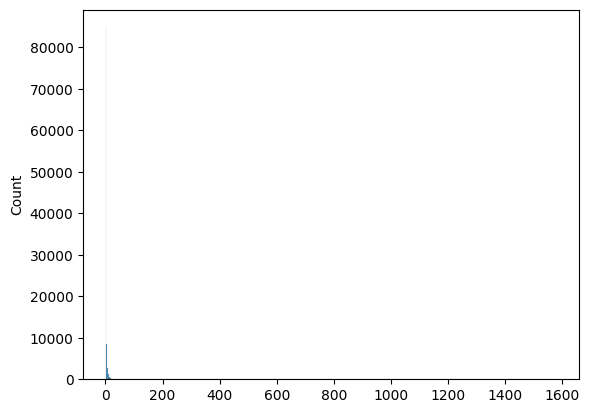

In [67]:
sns.histplot(X)

### Excercise 2

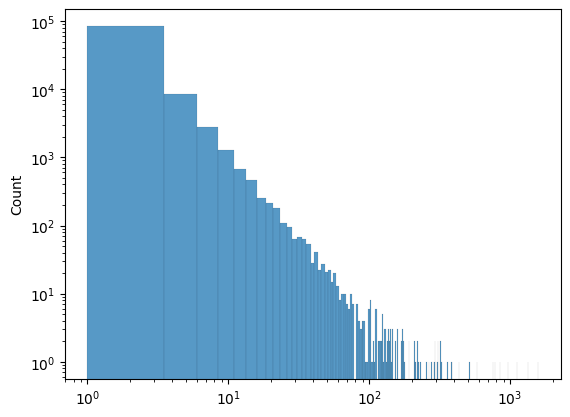

In [68]:
sns.histplot(X)
plt.xscale('log')
plt.yscale('log')

### Excercise 3

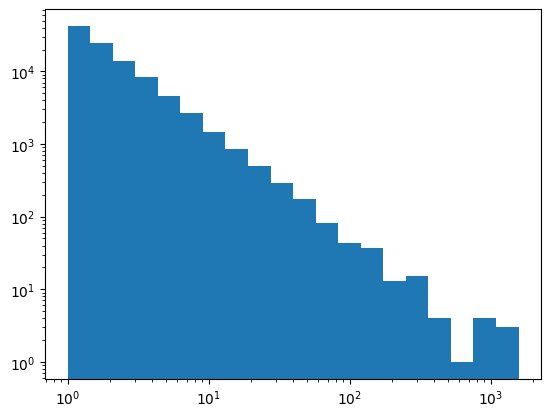

In [69]:
bin_edges = np.logspace(np.log10(X.min()), np.log10(X.max()), 21)
plt.hist(X, bins=bin_edges)
plt.xscale('log')
plt.yscale('log')

### Excercise 4

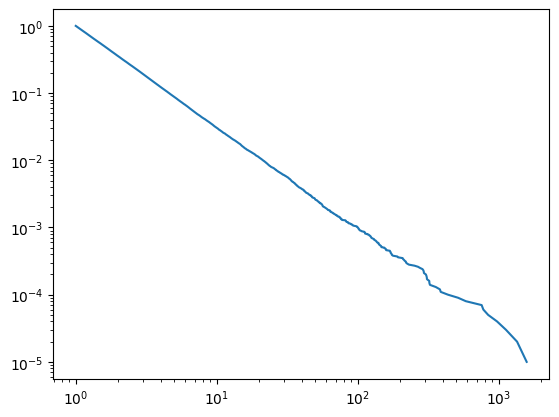

In [70]:
X_positive = X[X > 0]
sorted_X = np.sort(X_positive)
n = len(X_positive)
survival = 1 - np.arange(n) / n

plt.plot(sorted_X, survival)
plt.xscale('log')
plt.yscale('log')

### Excercise 6

In [ ]:
X_pos = X[X > 0]
sorted_X = np.sort(X_pos)
survival = 1 - np.arange(len(X_pos)) / len(X_pos)

log_x = np.log(sorted_X)
log_y = np.log(survival)
slope1 = np.polyfit(log_x, log_y, 1)[0]
alpha_survival = -slope1

bin_edges = np.logspace(np.log10(X_pos.min()), np.log10(X_pos.max()), 21)
counts, _ = np.histogram(X_pos, bins=bin_edges)
bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])

log_x = np.log(bin_centers[counts > 0])
log_y = np.log(counts[counts > 0])
slope2 = np.polyfit(log_x, log_y, 1)[0]
alpha_binned = -slope2

print(f"α from survival: {alpha_survival:.3f}")
print(f"α from binned: {alpha_binned:.3f}")

α from survival: 1.514
α from binned: 1.490


### Excercise 7

In [ ]:
x_min = X_pos.min()
x_above = X_pos[X_pos >= x_min]

alpha_mle = 1 + len(x_above) / np.sum(np.log(x_above / x_min))
print(f"MLE α = {alpha_mle:.3f}")

MLE α = 2.504


### Excercise 8

In [73]:
x_mins = np.unique(np.quantile(X_pos, [0.1, 0.2, 0.3, 0.4, 0.5]))

for x_min in x_mins:
    x_above = X_pos[X_pos >= x_min]
    alpha = 1 + len(x_above) / np.sum(np.log(x_above / x_min))
    print(f"x_min={x_min:.1f}: α={alpha:.3f}, n={len(x_above)}")

x_min=1.1: α=2.507, n=90000
x_min=1.2: α=2.509, n=80000
x_min=1.3: α=2.509, n=70000
x_min=1.4: α=2.513, n=60000
x_min=1.6: α=2.518, n=50000


# P4.2

We start from the definition of average neighbor degree:
⟨k⟩_nn(k) = ∑ₗ l P(l|k)

In uncorrelated networks, the conditional probability simplifies to:
P(l|k) = lP(l)/⟨k⟩

Substituting this into the definition:
⟨k⟩_nn(k) = ∑ₗ l × [lP(l)/⟨k⟩]
= (1/⟨k⟩) ∑ₗ l²P(l)

The sum ∑ₗ l²P(l) is the second moment ⟨k²⟩, so:
⟨k⟩_nn(k) = ⟨k²⟩/⟨k

# P4.3

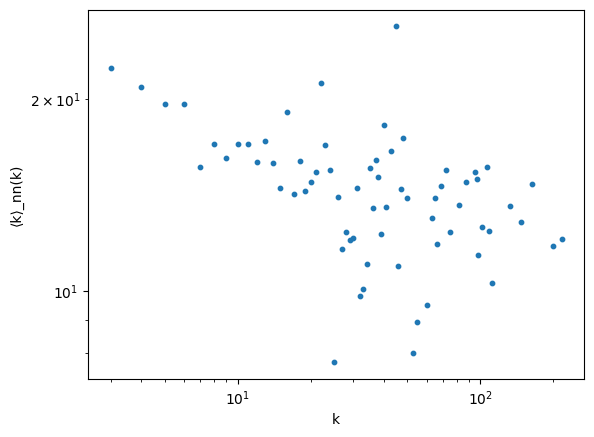

In [ ]:
def compute_knn_explicit(G):
    d = dict(G.degree())
    vals = defaultdict(list)
    for n in G:
        k = d[n]
        if k == 0:
            continue
        knn_i = np.mean([d[nb] for nb in G.neighbors(n)])
        vals[k].append(knn_i)
    ks = np.array(sorted(vals.keys()))
    knn_means = np.array([np.mean(vals[k]) for k in ks])
    return ks, knn_means

G = nx.barabasi_albert_graph(5000, 3)
ks, knn_means = compute_knn_explicit(G)
plt.scatter(ks, knn_means, s=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('⟨k⟩_nn(k)')
plt.show()

# P4.4

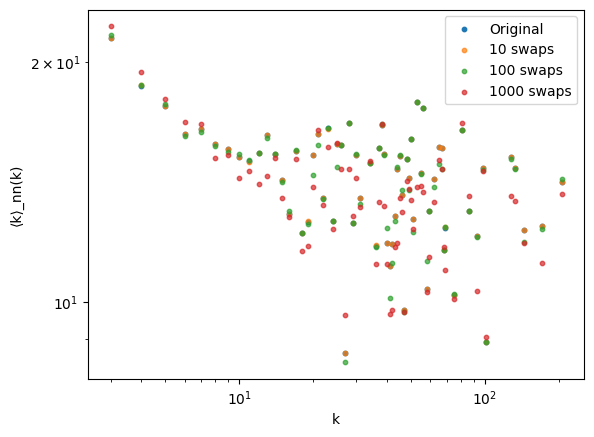

In [ ]:
def edge_switch(G, n_swaps):
    for _ in range(n_swaps):
        e1, e2 = np.random.choice(len(G.edges()), 2, replace=False)
        a, b = list(G.edges())[e1]
        c, d = list(G.edges())[e2]
        if len({a, b, c, d}) == 4 and not G.has_edge(a, d) and not G.has_edge(c, b):
            G.remove_edges_from([(a, b), (c, d)])
            G.add_edges_from([(a, d), (c, b)])

def compute_knn(G):
    d = dict(G.degree())
    vals = defaultdict(list)
    for n in G:
        k = d[n]
        if k == 0: 
            continue
        knn_i = np.mean([d[nb] for nb in G.neighbors(n)])
        vals[k].append(knn_i)
    ks = np.array(sorted(vals.keys()))
    knn_means = np.array([np.mean(vals[k]) for k in ks])
    return ks, knn_means

G = nx.barabasi_albert_graph(5000, 3)
ks, knn = compute_knn(G)
plt.scatter(ks, knn, s=10, label='Original')

for n_swaps in [10, 100, 1000]:
    G2 = G.copy()
    edge_switch(G2, n_swaps)
    ks2, knn2 = compute_knn(G2)
    plt.scatter(ks2, knn2, s=10, alpha=0.7, label=f'{n_swaps} swaps')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('⟨k⟩_nn(k)')
plt.legend()
plt.show()


# P4.6

100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:44<00:00,  1.65s/it]


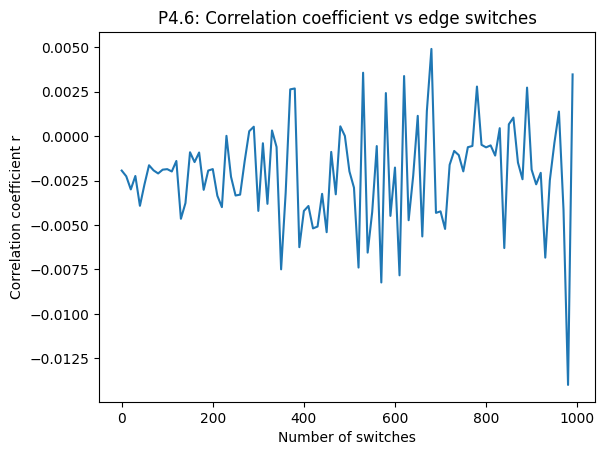

In [47]:
def calculate_r(G):
    degrees = dict(G.degree())
    edges = list(G.edges())
    M = len(edges)
    
    sum_jk = sum(degrees[u] * degrees[v] for u, v in edges)
    sum_j_plus_k = sum(degrees[u] + degrees[v] for u, v in edges)
    sum_j2_plus_k2 = sum(degrees[u]**2 + degrees[v]**2 for u, v in edges)
    
    numerator = sum_jk/M - (sum_j_plus_k/(2*M))**2
    denominator = sum_j2_plus_k2/(2*M) - (sum_j_plus_k/(2*M))**2
    
    return numerator / denominator

swaps_range = range(0, 1000, 10)
r_values = []

for n_swaps in tqdm(swaps_range):
    G_temp = G.copy()
    if n_swaps > 0:
        edge_switch(G_temp, n_swaps)
    r_values.append(calculate_r(G_temp))

# Plot
sns.lineplot(x=swaps_range, y=r_values)
plt.xlabel('Number of switches')
plt.ylabel('Correlation coefficient r')
plt.title('P4.6: Correlation coefficient vs edge switches')
plt.show()

# P4.7

In [ ]:
networks = {
    'Karate Club': nx.karate_club_graph(),
    'Les Miserables': nx.les_miserables_graph(),
}

results = []

for name, G in networks.items():
    N = G.number_of_nodes()
    E = G.number_of_edges()
    k_avg = 2 * E / N
    
    degrees = [d for n, d in G.degree()]
    k_min = min(degrees)
    degrees_above = [d for d in degrees if d >= k_min]
    alpha = 1 + len(degrees_above) / sum(np.log(np.array(degrees_above) / k_min))
    
    try:
        l_avg = nx.average_shortest_path_length(G)
    except:
        l_avg = float('inf')
    
    r = calculate_r(G)
    
    results.append({
        'Network': name,
        'N': N,
        'E': E,
        '⟨k⟩': round(k_avg, 2),
        'α': round(alpha, 2),
        'ℓ': round(l_avg, 2) if l_avg != float('inf') else '∞',
        'r': round(r, 3)
    })

df = pd.DataFrame(results)
print(df)

          Network   N    E   ⟨k⟩     α     ℓ      r
0     Karate Club  34   78  4.59  1.78  2.41 -0.476
1  Les Miserables  77  254  6.60  1.69  2.64 -0.165


# P4.9

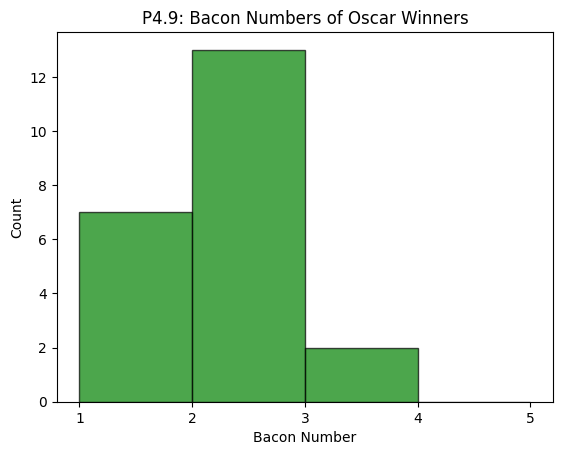

In [65]:
oscar_winners = {
    'Meryl Streep': 1,
    'Tom Hanks': 1, 
    'Leonardo DiCaprio': 2,
    'Katharine Hepburn': 2,
    'Jack Nicholson': 1,
    'Daniel Day-Lewis': 2,
    'Cate Blanchett': 2,
    'Robert De Niro': 1,
    'Anthony Hopkins': 2,
    'Denzel Washington': 2,
    'Nicole Kidman': 2,
    'Al Pacino': 2,
    'Emma Stone': 1,
    'Frances McDormand': 2,
    'Sean Penn': 1,
    'Julia Roberts': 1,
    'Marion Cotillard': 2,
    'Joaquin Phoenix': 2,
    'Brie Larson': 2,
    'Matthew McConaughey': 2,
    'Douglas Fairbanks': 3,
    'Mary Pickford': 3
}

plt.hist(oscar_winners.values(), bins=range(1, 6), alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Bacon Number')
plt.ylabel('Count')
plt.title('P4.9: Bacon Numbers of Oscar Winners')
plt.xticks(range(1, 6))
plt.show()